In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Importing dataset</h3>

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

<h3>Training model</h3>

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation="sigmoid")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8119 - loss: 0.7309
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.3099
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.2853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2668
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9273 - loss: 0.2648


In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9153 - loss: 0.3038


[0.2688472867012024, 0.9243000149726868]

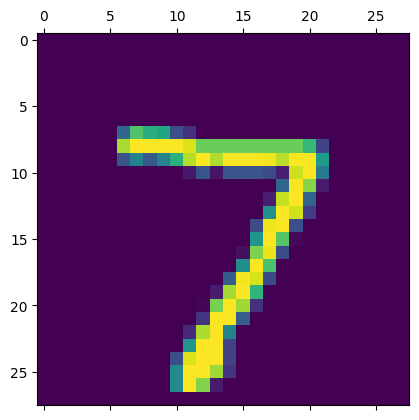

In [34]:
plt.matshow(X_test[0])

In [35]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
np.argmax(y_predicted[0])

np.int64(7)

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

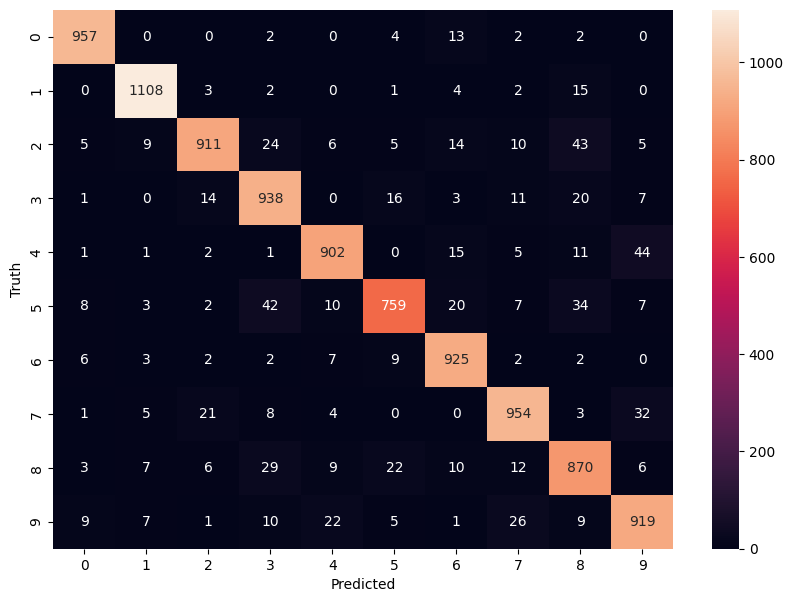

In [38]:
confucionMatrics = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize= (10, 7))
sns.heatmap(confucionMatrics, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

<h3>Training model by adding hidden layer</h3>

In [39]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (784,), activation="sigmoid"),
    keras.layers.Dense(16, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid"),
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_flattened, y_train, epochs = 5)

# Extract the accuracy and epochs from the history
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']

c:\Users\Hassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5559 - loss: 1.6507
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8981 - loss: 0.4204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9179 - loss: 0.2936
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9260 - loss: 0.2521
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9348 - loss: 0.2245


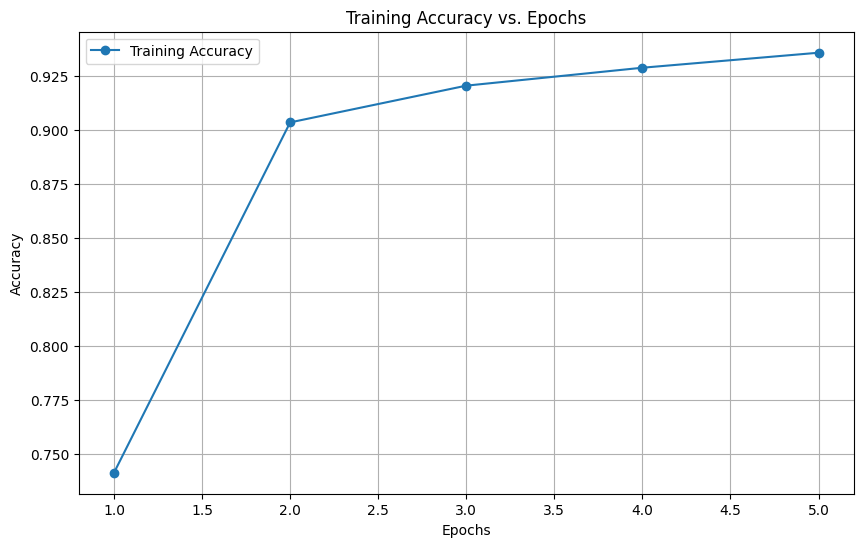

In [40]:
# Plot the accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, marker='o', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - loss: 0.2541


[0.2285151183605194, 0.9332000017166138]

Text(95.72222222222221, 0.5, 'Truth')

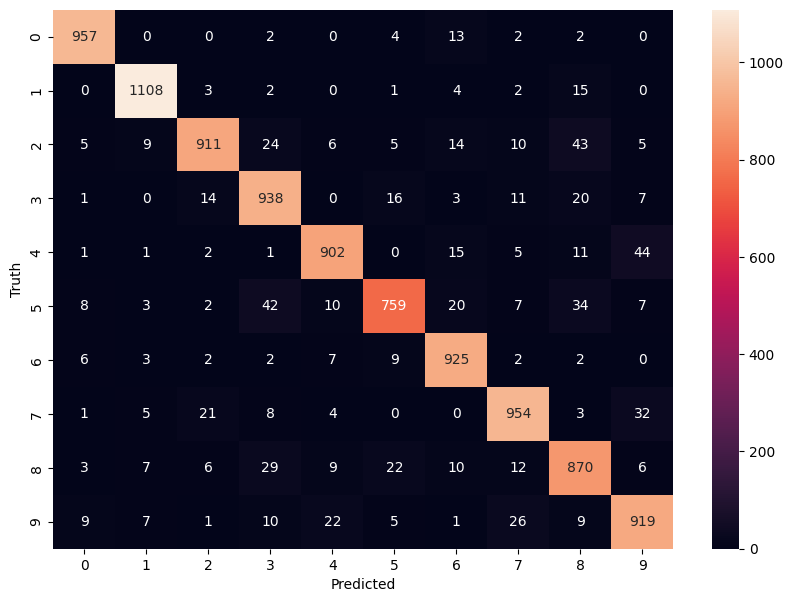

In [42]:
confucionMatrics = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize= (10, 7))
sns.heatmap(confucionMatrics, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

<h3>Decreasing the hidden layers to 1 with different number of neurons</h3>

In [43]:
model = keras.Sequential([
    keras.layers.Dense(250, input_shape = (784,), activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid"),
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_flattened, y_train, epochs = 5)

# Extract the accuracy and epochs from the history
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']

c:\Users\Hassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8517 - loss: 0.5774
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9428 - loss: 0.1934
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9624 - loss: 0.1346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9738 - loss: 0.0920
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0696


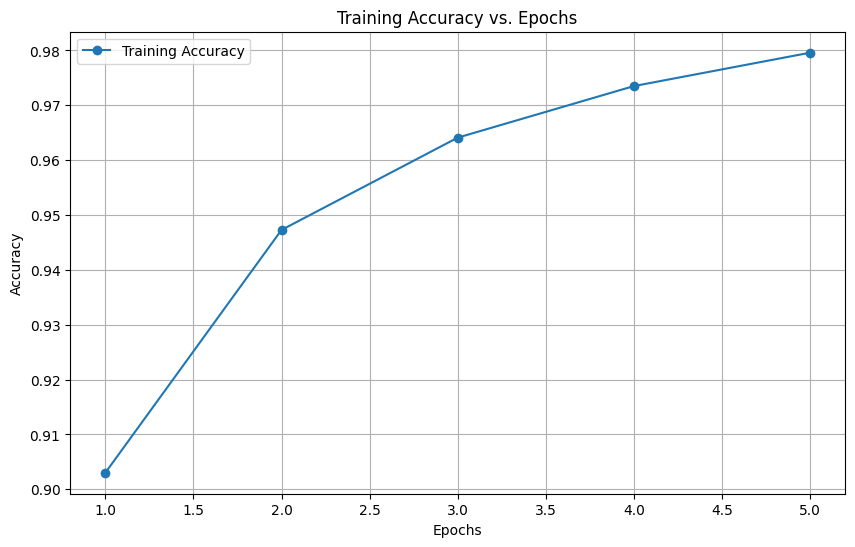

In [44]:
# Plot the accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, marker='o', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.0991


[0.08630628138780594, 0.9728000164031982]

Text(95.72222222222221, 0.5, 'Truth')

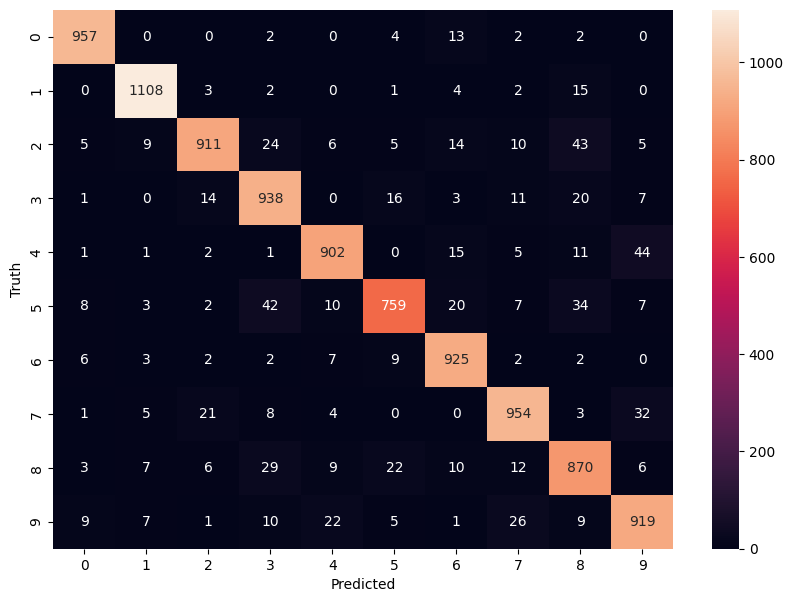

In [46]:
confucionMatrics = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize= (10, 7))
sns.heatmap(confucionMatrics, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

<h3>Using the relu activation function</h3>

In [47]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (784,), activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_flattened, y_train, epochs = 5)

# Extract the accuracy and epochs from the history
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']

c:\Users\Hassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1139 - loss: 3.3250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.2107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0999 - loss: 2.2554
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0972 - loss: 2.2257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0995 - loss: 2.2492


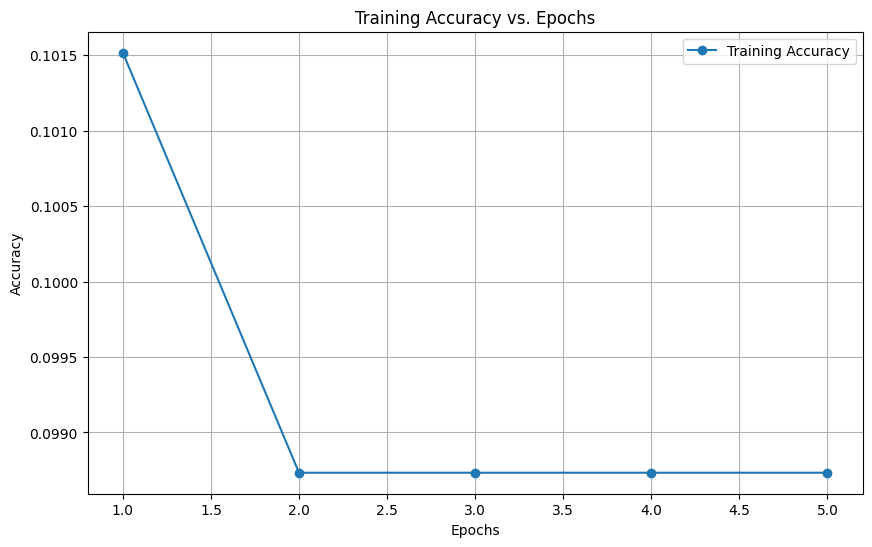

In [48]:
# Plot the accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, marker='o', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 2.2134


[2.1964128017425537, 0.09799999743700027]

Text(95.72222222222221, 0.5, 'Truth')

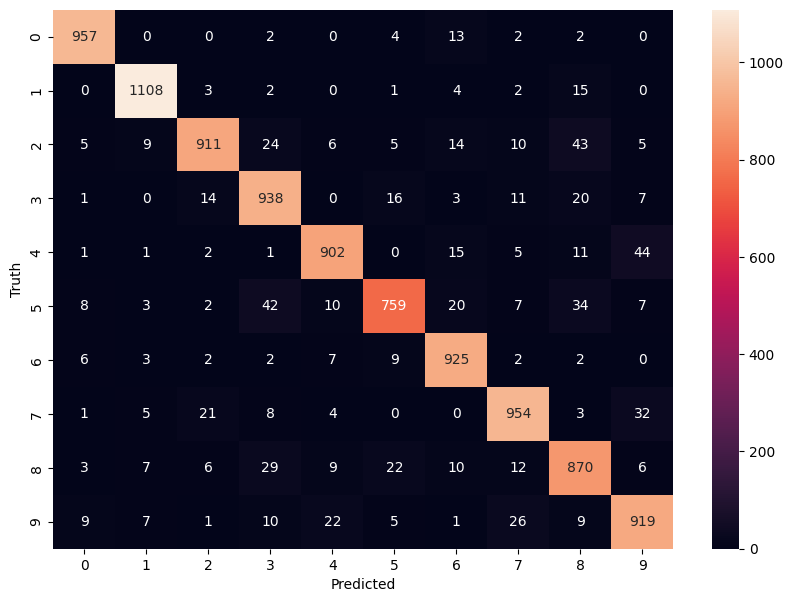

In [50]:
confucionMatrics = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize= (10, 7))
sns.heatmap(confucionMatrics, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")